# Wine Quality Dataset Exploration

## Dataset

In this project, I have explored the Wine Quality dataset.  
This dataset includes two sets in csv format, one for red wine and the other for white wine.  
The goal is to model wine quality based on physicochemical tests or measurements. 

Each wine sample is described by Eleven sensor measurements (or features) and One output label (quality level).

The eleven attributes include:

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 – alcohol

The output label represents the level of quality classified by wine experts. 
12 - quality (score between 0 and 10)

More details about these 12 attributes can be found in the reference: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

### Importing the required packages

In [27]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from pandas.plotting import scatter_matrix
from sklearn.neighbors import DistanceMetric

### Reading two CSV files into respective data frames from the current working directory

In [28]:
def read_csv_files():
    directory = os.getcwd()
    print("The directory to read the csv files from is: ", directory)
    # Concatenating the absolute file path and file name
    red_wine_quality_file = os.path.join(os.path.abspath(directory), 'winequality-red.csv')
    white_wine_quality_file = os.path.join(os.path.abspath(directory), 'winequality-white.csv')

    if os.path.exists(red_wine_quality_file):
        red_wine_quality = pd.read_csv(red_wine_quality_file, sep=';')
    else:
        print('File winequality-red.csv does not exists at the location')

    if os.path.exists(white_wine_quality_file):
        white_wine_quality = pd.read_csv(white_wine_quality_file, sep=';')
    else:
        print('File winequality-white does not exists at the location')
    return red_wine_quality, white_wine_quality


red_wine_quality, white_wine_quality = read_csv_files()

The directory to read the csv files from is:  C:\Users\munge\CS653 Data Mining and Knowledge Discovery\Wine Quality Dataset Exploration


### Checking Red Wine Data Frame Features for Data Cleaning

In [29]:
# Setting the index starting from 1
red_wine_quality.index += 1 

print("Red Wine Quality Data Frame Shape: ", red_wine_quality.shape)

Red Wine Quality Data Frame Shape:  (1599, 12)


In [30]:
# Get summary of Data Frame
red_wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 1 to 1599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [31]:
red_wine_NaN_rows = red_wine_quality.shape[0] - red_wine_quality.dropna().shape[0]
print("Number of rows with Null or NaN for Red Wine Quality: ", red_wine_NaN_rows)

red_wine_NaN_cols = red_wine_quality.shape[1] - red_wine_quality.dropna().shape[1]
print("Number of columns with Null or NaN for Red Wine Quality: ", red_wine_NaN_cols)

Number of rows with Null or NaN for Red Wine Quality:  0
Number of columns with Null or NaN for Red Wine Quality:  0


In [32]:
# Get the top 5 rows from data frame
(red_wine_quality.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Checking White Wine Data Frame Features for Data Cleaning

In [33]:
# Setting the index starting from 1
white_wine_quality.index += 1 

print("White Wine Quality Data Frame Shape: ", white_wine_quality.shape)

White Wine Quality Data Frame Shape:  (4898, 12)


In [34]:
# Get summary of Data Frame
white_wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 1 to 4898
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [35]:
white_wine_NaN_rows = white_wine_quality.shape[0] - white_wine_quality.dropna().shape[0]
print("Number of rows with Null or NaN for White Wine Quality: ", white_wine_NaN_rows)

white_wine_NaN_cols = white_wine_quality.shape[1] - white_wine_quality.dropna().shape[1]
print("Number of columns with Null or NaN for White Wine Quality: ", white_wine_NaN_cols)

Number of rows with Null or NaN for White Wine Quality:  0
Number of columns with Null or NaN for White Wine Quality:  0


In [36]:
# Get the top 5 rows from data frame
(white_wine_quality.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### Observation: 
After checking both the data frames, there were no NaN or Null values or data type mismatch. Row Index reset to start from 1 and data cleaning is complete

### Task 1 : 
#### 1.1 Explore the attribute of quality using the histogram for Red Wine Quality and White Wine Quality.

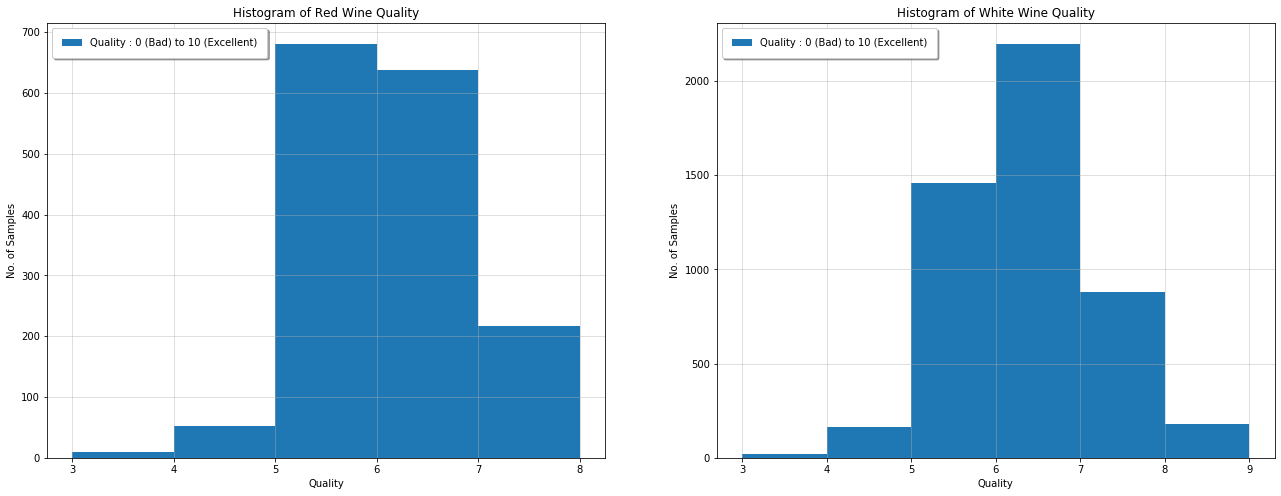

In [37]:
# Red Wine Data set
fig1, ax = plt.subplots(1,2, figsize=(22,8))
ax[0].hist(red_wine_quality['quality'],label='Quality : 0 (Bad) to 10 (Excellent)', bins=5)
ax[0].set(xlabel='Quality', ylabel='No. of Samples', title='Histogram of Red Wine Quality')
ax[0].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc='upper left')
ax[0].grid(alpha=0.5)

ax[1].hist(white_wine_quality['quality'],label='Quality : 0 (Bad) to 10 (Excellent)', bins=6)
ax[1].set(xlabel='Quality', ylabel='No. of Samples', title='Histogram of White Wine Quality')
ax[1].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc='upper left')
ax[1].grid(alpha=0.5)

plt.show()

#### Observation:
Highest number of red wine samples have quality between 5 and 6 while the distribution is spread between the value from 3 to 8. Highest number of white wine samples have quality between 6 and 7 while the distribution is spread between the values from 3 to 9.




#### 1.2 Generate the histogram of 11 ratings for each dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EDC5E91DC8>,
      dtype=object)

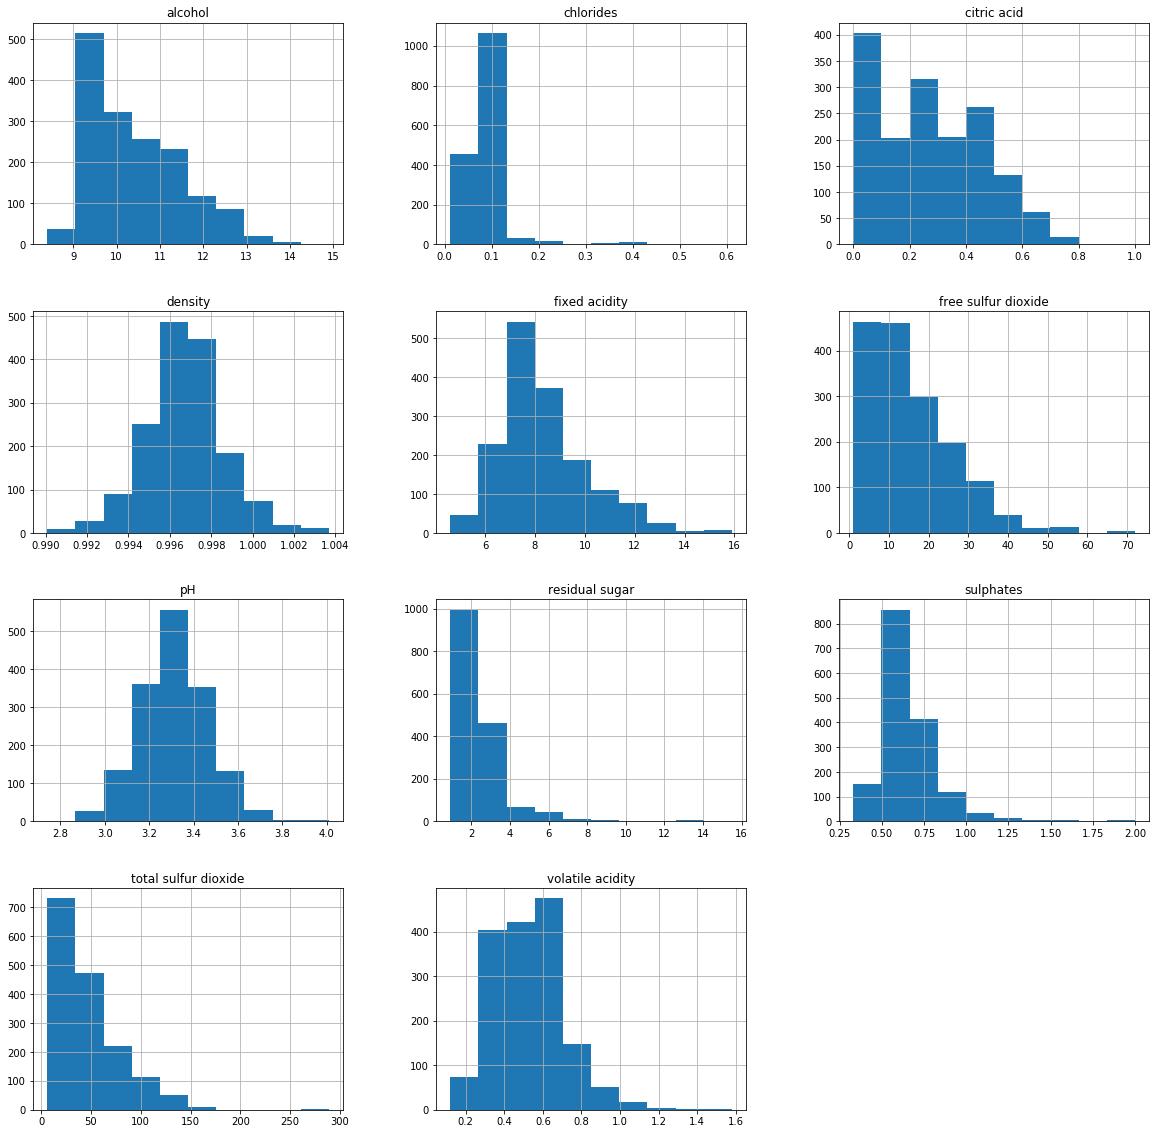

In [38]:
red_wine_quality.hist(column=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
                      'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'],figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EDC3A4A808>,
      dtype=object)

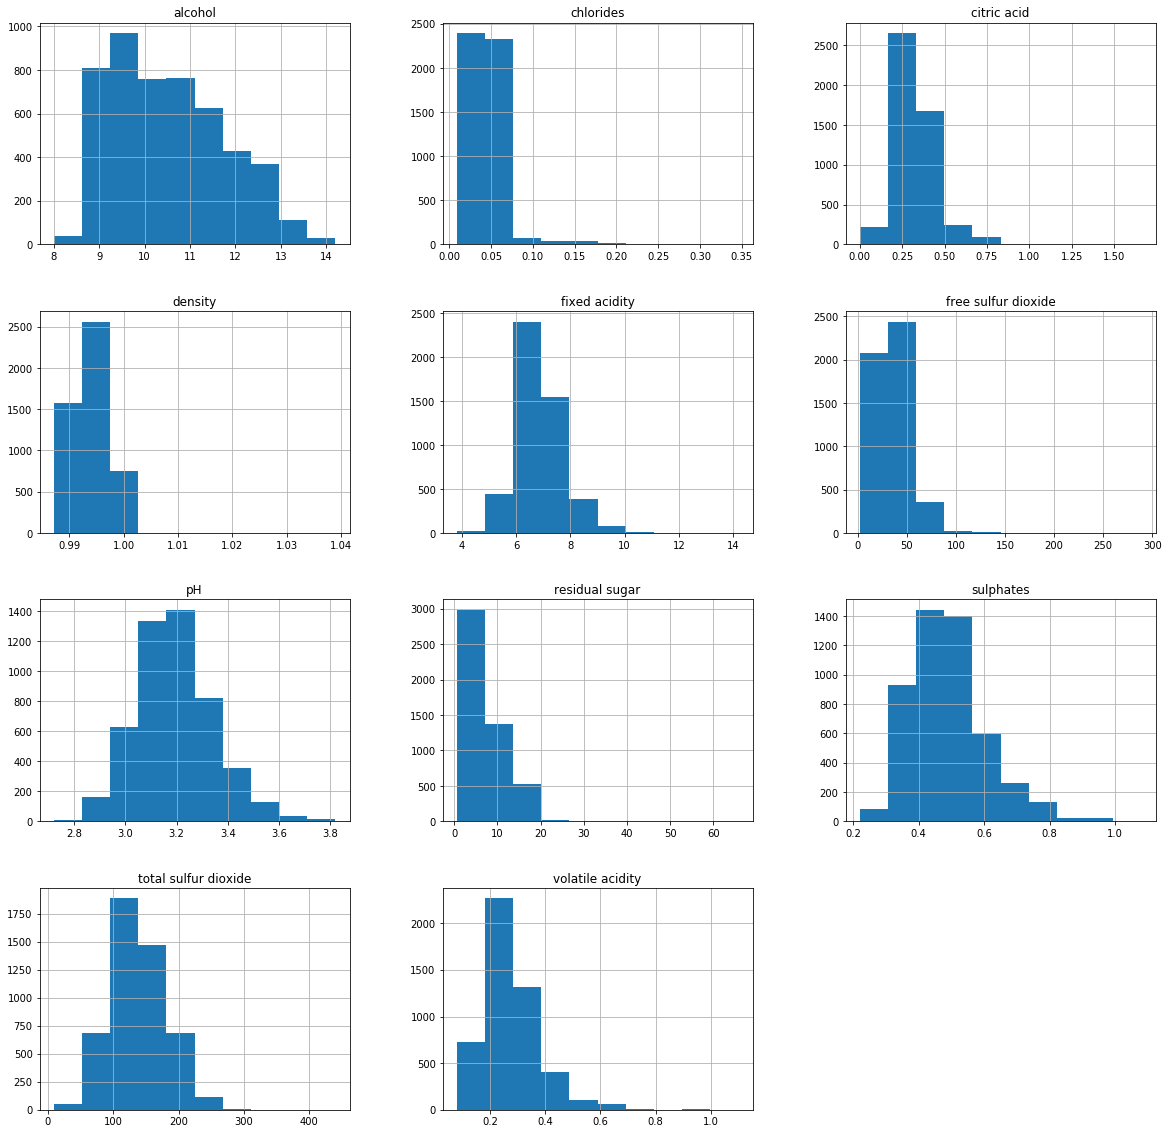

In [39]:
white_wine_quality.hist(column=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
                      'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'],figsize=(20,20))

#### Observation:
1. Alcohol : Number of red wine samples reduces from value 9 to 14. For white wine, it shows rise in samples with value from 8 to around 9.5 and gradually reduces till 14 
           
2. Chlorides : Majority of red wine sample have value between 0 to higher side of 0.1 (around 0.133). Majority of white wine samples have value between 0 to higher side of 0.05 (around 0.075)
        
3. Citric Acid : Red wine samples have spread between value 0 to 0.8 , white wine samples have spread between value 0 to around 0.75

4. Density : Red wine samples have bell shaped distribution from 0.990 to around less than 1.004, white wine samples have distribution concentrated between less than 0.99 to little beyond 1.00

5. Fixed Acidity : Majority of red wine samples have values between 6 to 12 while minority of them have a little less than 6 and little high value than 14. Most of the white wine samples have values between 5 to 10

6. Free Sulfur Dioxide : Most of the red wine samples have value between 0 till 50 and very few have near to 70. Most of the white wine samples have value between 0 to around 100

7. pH : Red Wine samples have pH higher than 2.8 to around 3.8 while white wine samples have value less than 2.8 to 3.8

8. Residual Sugar : Majority red wine sample have value between 1 to 4 (few samples have value between 12 to 14) while majority of white wine samples have value between 0 to 20

9. Sulphates : Red wine samples have value higher side of 0.25 to higher side of 1.50 (very few samples have value from 1.75 to 2). White wine samples have value from around 0.2 till 1

10. Total Sulfur Dioxide : High number of red wine samples have value between 0 to 50 and the number of samples reduces till around 175 value. White wine samples have majority of samples with values from 50 to around 200

11. Volatile Acidity : Most of the red wine samples have value from 0.1 to 1.1. Most of the white wine samples have value from 0.1 to 0.5




### Task 2 : For each dataset, box plotting the attributes: fixed acidity, volatile acdity, pH, and density. 

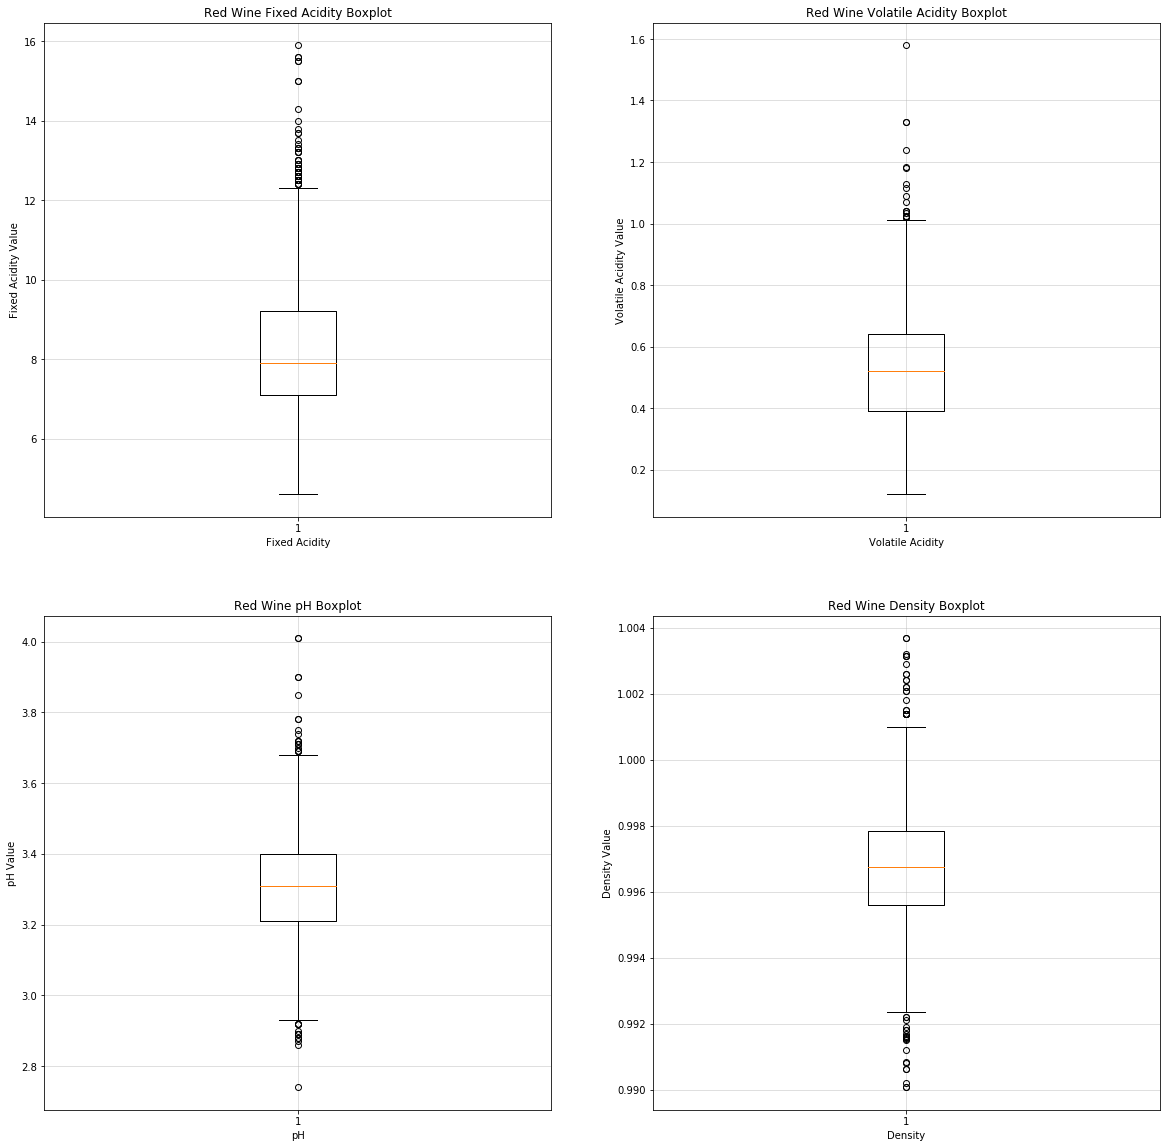

In [40]:
# Red Wine Data set
fig1, ax = plt.subplots(2,2, figsize=(20,20))
ax[0,0].boxplot(red_wine_quality['fixed acidity'])
ax[0,0].set(xlabel='Fixed Acidity', ylabel='Fixed Acidity Value', title='Red Wine Fixed Acidity Boxplot')
ax[0,0].grid(alpha=0.5)

ax[0,1].boxplot(red_wine_quality['volatile acidity'])
ax[0,1].set(xlabel='Volatile Acidity', ylabel='Volatile Acidity Value', title='Red Wine Volatile Acidity Boxplot')
ax[0,1].grid(alpha=0.5)

ax[1,0].boxplot(red_wine_quality['pH'])
ax[1,0].set(xlabel='pH', ylabel='pH Value', title='Red Wine pH Boxplot')
ax[1,0].grid(alpha=0.5)

ax[1,1].boxplot(red_wine_quality['density'])
ax[1,1].set(xlabel='Density', ylabel='Density Value', title='Red Wine Density Boxplot')
ax[1,1].grid(alpha=0.5)

plt.show()

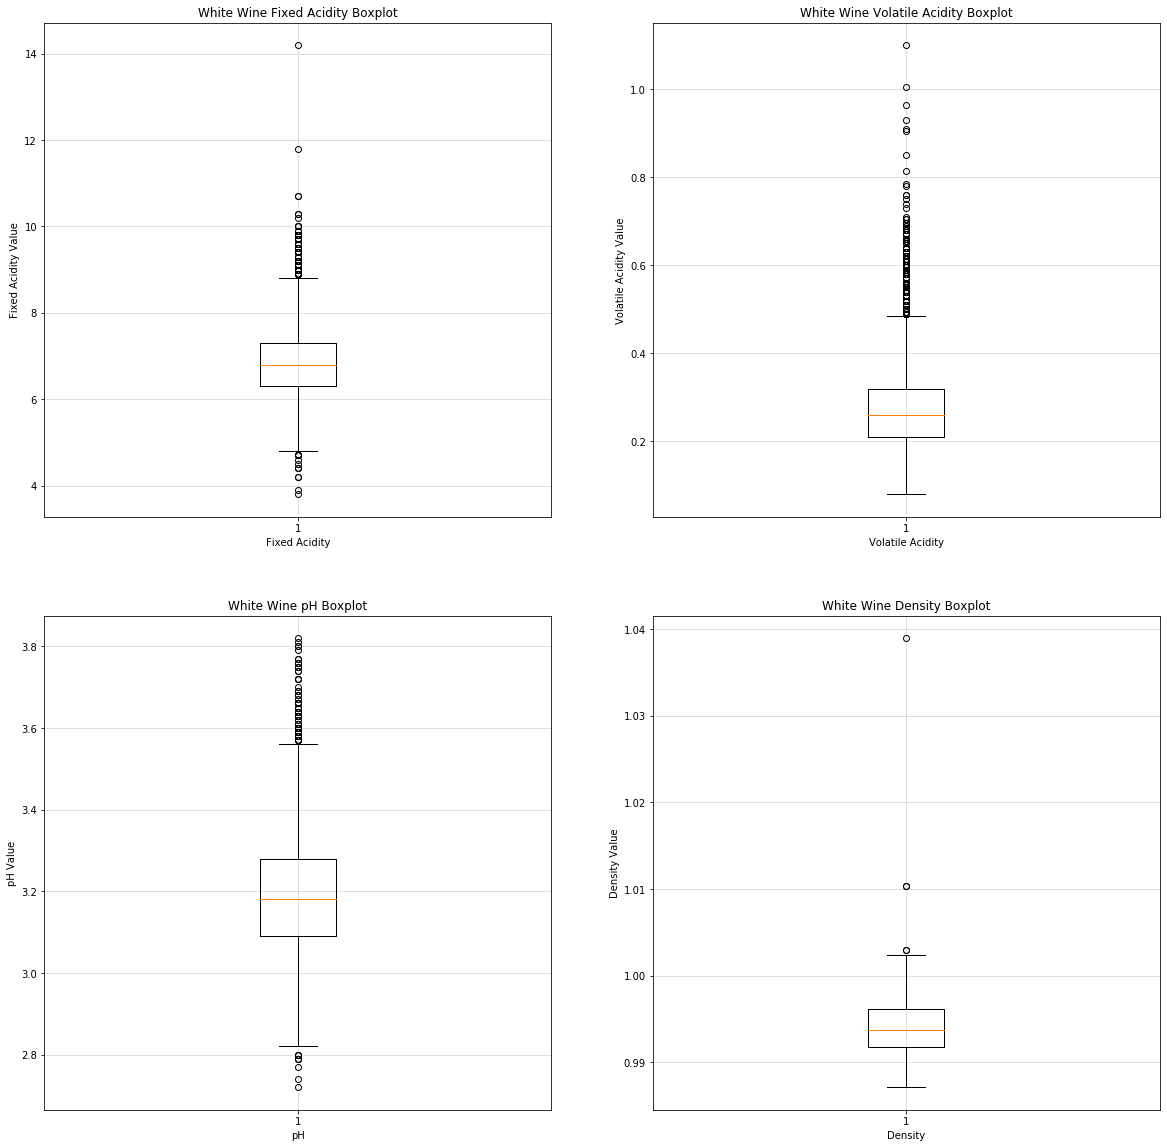

In [41]:
# White Wine Data set
fig1, ax = plt.subplots(2,2, figsize=(20,20))
ax[0,0].boxplot(white_wine_quality['fixed acidity'])
ax[0,0].set(xlabel='Fixed Acidity', ylabel='Fixed Acidity Value', title='White Wine Fixed Acidity Boxplot')
ax[0,0].grid(alpha=0.5)

ax[0,1].boxplot(white_wine_quality['volatile acidity'])
ax[0,1].set(xlabel='Volatile Acidity', ylabel='Volatile Acidity Value', title='White Wine Volatile Acidity Boxplot')
ax[0,1].grid(alpha=0.5)

ax[1,0].boxplot(white_wine_quality['pH'])
ax[1,0].set(xlabel='pH', ylabel='pH Value', title='White Wine pH Boxplot')
ax[1,0].grid(alpha=0.5)

ax[1,1].boxplot(white_wine_quality['density'])
ax[1,1].set(xlabel='Density', ylabel='Density Value', title='White Wine Density Boxplot')
ax[1,1].grid(alpha=0.5)

plt.show()

#### Observation :
Fixed Acitity Values :

Red Wine : Minimum is 3.95, Q1 is 7.1, median is 7.9, Q3 is 9.2, Maximum is 12.34

White Wine : Minimum is 4.8, Q1 is 6.3, median is 6.8, Q3 is 7.3, Maximum is 8.8
    
Volatile Acitity Values :

Red Wine : Minimum is 0.015, Q1 is 0.39, median is 0.52, Q3 is 0.64, Maximum is 1.015

White Wine : Minimum is 0.0449, Q1 is 0.21, median is 0.26, Q3 is 0.32, Maximum is 0.485
    
pH Values :

Red Wine : Minimum is 2.925, Q1 is 3.21, median is 3.31, Q3 is 3.4, Maximum is 3.684

White Wine : Minimum is 2.804, Q1 is 3.09, median is 3.18, Q3 is 3.28, Maximum is 3.564
    
Density Values :

Red Wine : Minimum is 0.992, Q1 is 0.995, median is 0.996, Q3 is 0.997, Maximum is 1.001

White Wine : Minimum is 0.985, Q1 is 0.991, median is 0.993, Q3 is 0.996, Maximum is 1.002



### Task 3 : Generate a scatter matrix for the attributes: fixed acidity, volatile acidity, citric acid, and residual sugar.  

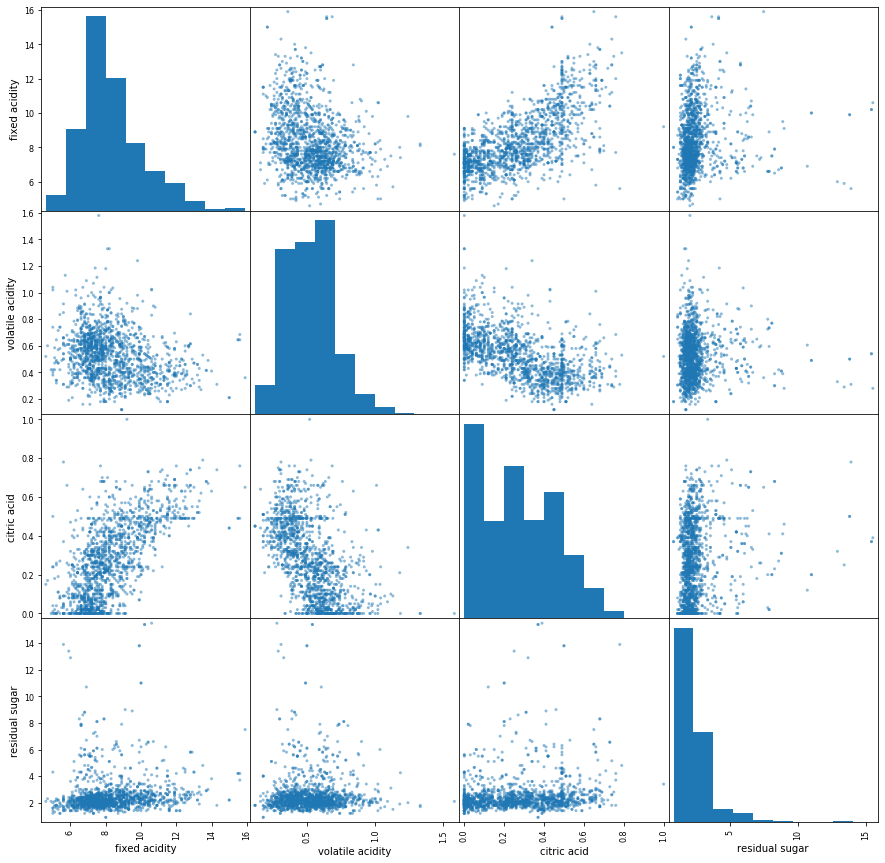

In [42]:
red_wine_scatter_matrix = red_wine_quality[['fixed acidity','volatile acidity','citric acid','residual sugar']]
scatter_matrix(red_wine_scatter_matrix, alpha=0.5, figsize=(15,15))
plt.show()

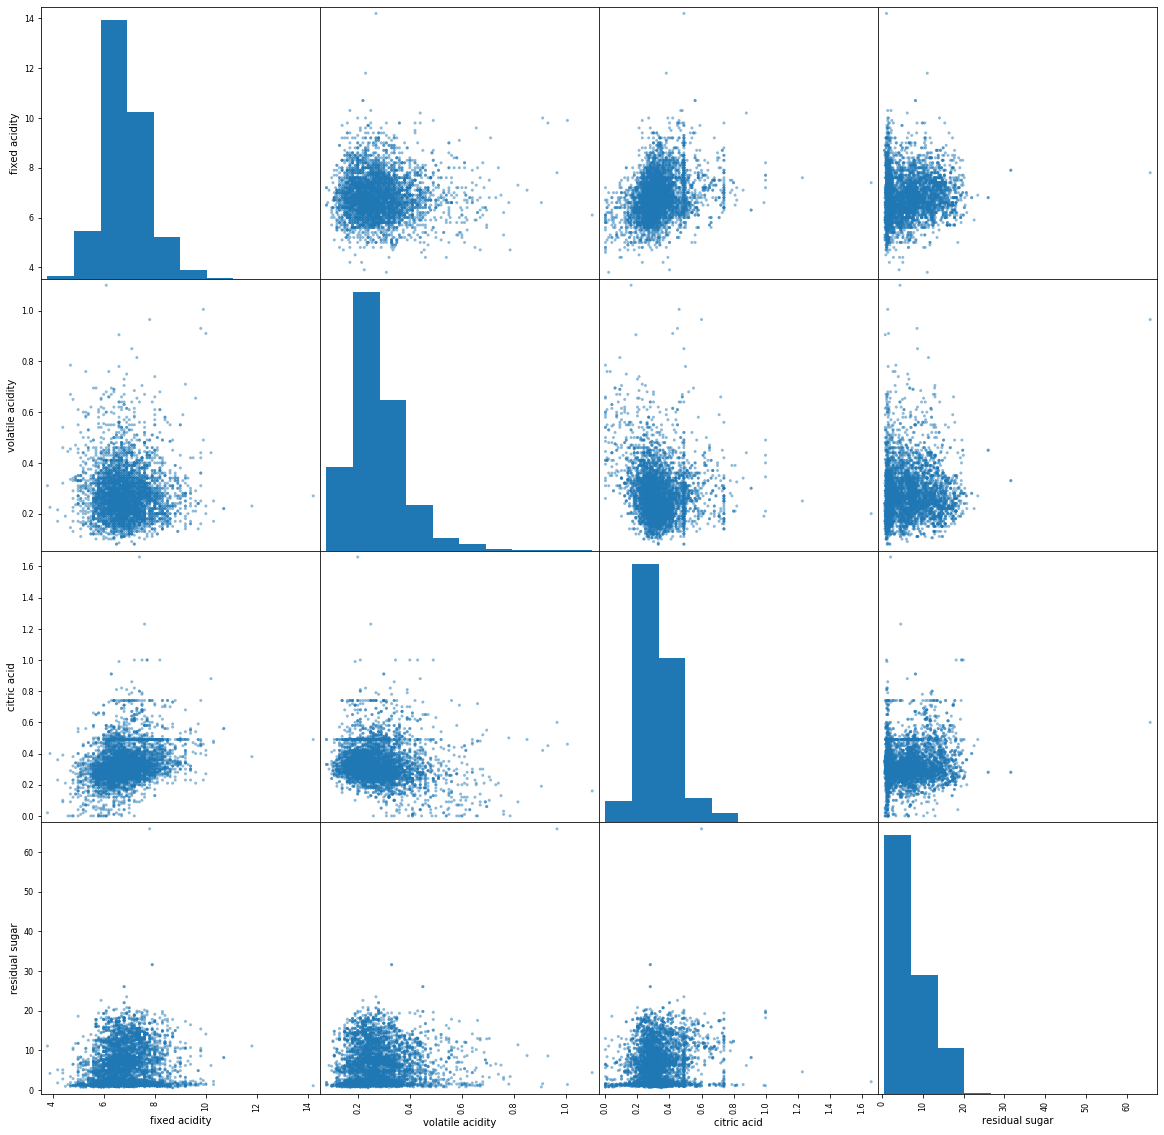

In [43]:
white_wine_scatter_matrix = white_wine_quality[['fixed acidity','volatile acidity','citric acid','residual sugar']]
scatter_matrix(white_wine_scatter_matrix, alpha=0.5, figsize=(20,20))
plt.show()

#### Observation:
Red Wine Data Set: There is a moderately strong, negative, linear association between citric acid and volatile acidity with a few potential outliers.

There is a moderately strong, positive, linear association between citric acid and fixed acidity with a few potential outliers.

White Wine Data Set: Weak Correlation is observed between attributes of white wine set

 ### Task 4. Visualize between-sample similarity matrices over each of the two datasets. 

Represent every sample with the following ten attributes (except the quality)
 
1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 – sulphates

which leads to a 10-element vector per sample. 

For every two samples, compute their pair-wise distance/similarities using the following metrics:

• Euclidean distance

• Minkowski distance ( r=1)
 
• Minkowski distance ( r=3)

• Minkowski distance ( r=5)

• Mahalanobis Distance

• Cosine Similarity

• Correlation

• A linear combination of Euclidean distance and Minkowski Distance (r=1)

Each of the above metric will lead to a matrix where the element (i,j)  stores the similarity or distance between samples i and j. Please sort all samples so that samples of the same quality level appear together. Visualize the matrix. Note that you should generate the matrix plotting for each of the above metric.  


#### Red Wine Data Set

In [44]:
# Get selected features into a data frame sorted by Quality value
red_wine = red_wine_quality[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
                  'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','quality']].sort_values('quality')
# Dropped Quality Column
red_wine= red_wine.drop(['quality'], axis = 1)
(red_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
1479,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52
833,10.4,0.440,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86
900,8.3,1.020,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49
1375,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51
460,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57
...,...,...,...,...,...,...,...,...,...,...
496,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65
1404,7.2,0.330,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10
1091,10.0,0.260,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63
1450,7.2,0.380,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76


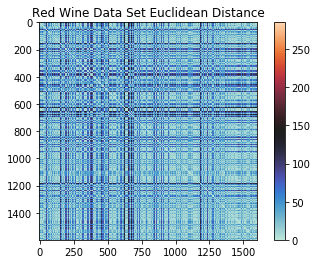

In [45]:
# Euclidean Distance for red wine data set
red_wine_data = red_wine.to_records(index=False)
red_wine_matrix = []
for i in red_wine_data:
    red_wine_matrix.append(list(i))
    
euclidean_distance = DistanceMetric.get_metric('euclidean')
euclidean_pairwise_distance = euclidean_distance.pairwise(red_wine_matrix)
red_wine_color_map = plt.imshow(euclidean_pairwise_distance)
red_wine_color_map.set_cmap("icefire")
plt.colorbar()
plt.title('Red Wine Data Set Euclidean Distance')
plt.show()

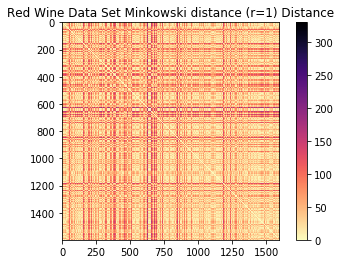

In [46]:
# Minkowski distance (r=1) for red wine data set
minkowski_distance_r1 = DistanceMetric.get_metric('minkowski', p=1)
minkowski_pairwise_distance_r1 = minkowski_distance_r1.pairwise(red_wine_matrix)
red_wine_color_map = plt.imshow(minkowski_pairwise_distance_r1)
red_wine_color_map.set_cmap("magma_r")
plt.colorbar()
plt.title('Red Wine Data Set Minkowski distance (r=1) Distance')
plt.show()

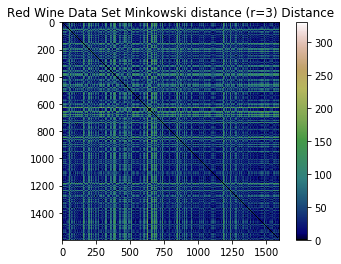

In [47]:
# Minkowski distance (r=3) for red wine data set
minkowski_distance_r3 = DistanceMetric.get_metric('minkowski', p=1)
minkowski_pairwise_distance_r3 = minkowski_distance_r3.pairwise(red_wine_matrix)
red_wine_color_map = plt.imshow(minkowski_pairwise_distance_r3)
red_wine_color_map.set_cmap("gist_earth")
plt.colorbar()
plt.title('Red Wine Data Set Minkowski distance (r=3) Distance')
plt.show()

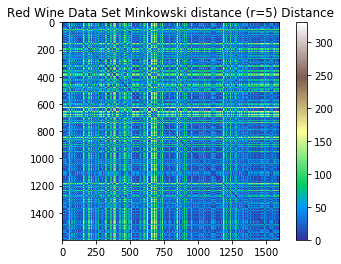

In [48]:
# Minkowski distance (r=5) for red wine data set
minkowski_distance_r5 = DistanceMetric.get_metric('minkowski', p=1)
minkowski_pairwise_distance_r5 = minkowski_distance_r5.pairwise(red_wine_matrix)
red_wine_color_map = plt.imshow(minkowski_pairwise_distance_r5)
red_wine_color_map.set_cmap("terrain")
plt.colorbar()
plt.title('Red Wine Data Set Minkowski distance (r=5) Distance')
plt.show()

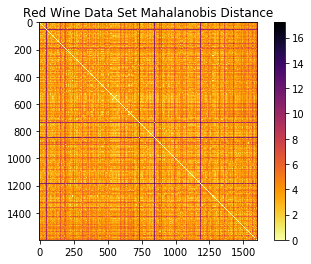

In [49]:
# Mahalanobis Distance for red wine data set
mahalanobis_distance = DistanceMetric.get_metric('mahalanobis', V=np.cov(red_wine.values.T))
mahalanobis_pairwise_distance = mahalanobis_distance.pairwise(red_wine_matrix)
red_wine_color_map = plt.imshow(mahalanobis_pairwise_distance)
red_wine_color_map.set_cmap("inferno_r")
plt.colorbar()
plt.title('Red Wine Data Set Mahalanobis Distance')
plt.show()

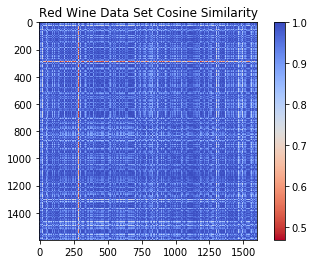

In [50]:
# Cosine Similarity for red wine data set
cos_similarity_red_wine = sk.metrics.pairwise.cosine_similarity(red_wine_matrix)
red_wine_color_map = plt.imshow(cos_similarity_red_wine)
red_wine_color_map.set_cmap("coolwarm_r")
plt.colorbar()
plt.title('Red Wine Data Set Cosine Similarity')
plt.show()

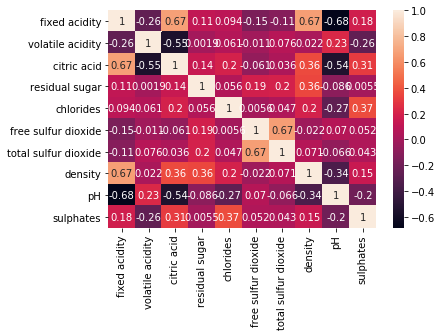

<Figure size 36000x36000 with 0 Axes>

In [51]:
# Correlation for red wine data set
correlation_matrix_red_wine = red_wine.corr()
sns.heatmap(correlation_matrix_red_wine, annot=True)
plt.figure(figsize=(500,500))
plt.show()

#### White Wine Data Set

In [52]:
# Get selected features into a data frame sorted by Quality value
white_wine = white_wine_quality[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
                  'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','quality']].sort_values('quality')
# Dropped Quality Column
white_wine= white_wine.drop(['quality'], axis = 1)
(white_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
3308,9.4,0.24,0.29,8.5,0.037,124.0,208.0,0.99395,2.90,0.38
446,7.1,0.32,0.32,11.0,0.038,16.0,66.0,0.99370,3.24,0.40
2051,11.8,0.23,0.38,11.1,0.034,15.0,123.0,0.99970,2.93,0.55
3811,6.8,0.26,0.34,15.1,0.060,42.0,162.0,0.99705,3.24,0.52
3410,6.2,0.23,0.35,0.7,0.051,24.0,111.0,0.99160,3.37,0.43
...,...,...,...,...,...,...,...,...,...,...
775,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46
828,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48
877,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36
821,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61


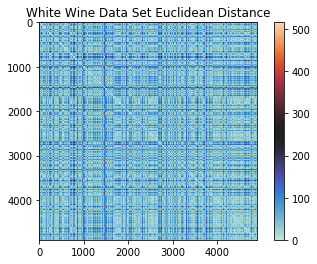

In [53]:
# Euclidean Distance for white wine data set
white_wine_data = white_wine.to_records(index=False)
white_wine_matrix = []
for i in white_wine_data:
    white_wine_matrix.append(list(i))
    
euclidean_distance = DistanceMetric.get_metric('euclidean')
euclidean_pairwise_distance = euclidean_distance.pairwise(white_wine_matrix)
white_wine_color_map = plt.imshow(euclidean_pairwise_distance)
white_wine_color_map.set_cmap("icefire")
plt.colorbar()
plt.title('White Wine Data Set Euclidean Distance')
plt.show()

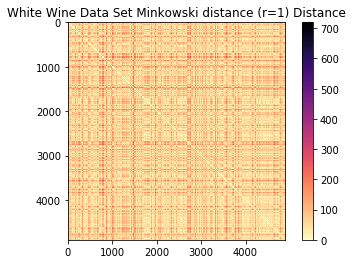

In [54]:
# Minkowski distance (r=1) for white wine data set
minkowski_distance_r1 = DistanceMetric.get_metric('minkowski', p=1)
minkowski_pairwise_distance_r1 = minkowski_distance_r1.pairwise(white_wine_matrix)
white_wine_color_map = plt.imshow(minkowski_pairwise_distance_r1)
white_wine_color_map.set_cmap("magma_r")
plt.colorbar()
plt.title('White Wine Data Set Minkowski distance (r=1) Distance')
plt.show()

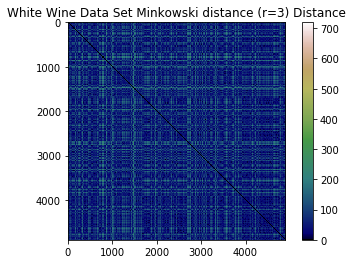

In [55]:
# Minkowski distance (r=3) for white wine data set
minkowski_distance_r3 = DistanceMetric.get_metric('minkowski', p=1)
minkowski_pairwise_distance_r3 = minkowski_distance_r3.pairwise(white_wine_matrix)
white_wine_color_map = plt.imshow(minkowski_pairwise_distance_r3)
white_wine_color_map.set_cmap("gist_earth")
plt.colorbar()
plt.title('White Wine Data Set Minkowski distance (r=3) Distance')
plt.show()

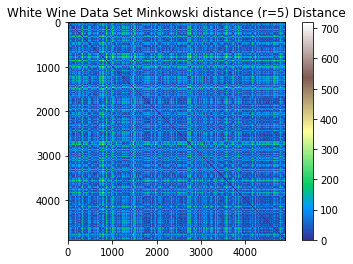

In [56]:
# Minkowski distance (r=5) for White wine data set
minkowski_distance_r5 = DistanceMetric.get_metric('minkowski', p=1)
minkowski_pairwise_distance_r5 = minkowski_distance_r5.pairwise(white_wine_matrix)
white_wine_color_map = plt.imshow(minkowski_pairwise_distance_r5)
white_wine_color_map.set_cmap("terrain")
plt.colorbar()
plt.title('White Wine Data Set Minkowski distance (r=5) Distance')
plt.show()

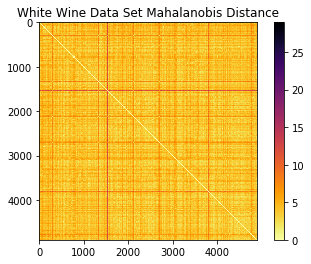

In [57]:
# Mahalanobis Distance for White wine data set
mahalanobis_distance = DistanceMetric.get_metric('mahalanobis', V=np.cov(white_wine.values.T))
mahalanobis_pairwise_distance = mahalanobis_distance.pairwise(white_wine_matrix)
white_wine_color_map = plt.imshow(mahalanobis_pairwise_distance)
white_wine_color_map.set_cmap("inferno_r")
plt.colorbar()
plt.title('White Wine Data Set Mahalanobis Distance')
plt.show()

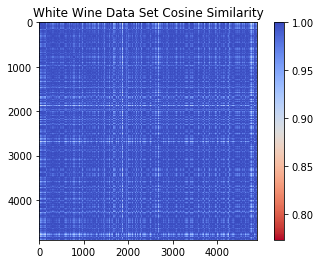

In [58]:
# Cosine Similarity for white wine data set
cos_similarity_white_wine = sk.metrics.pairwise.cosine_similarity(white_wine_matrix)
white_wine_color_map = plt.imshow(cos_similarity_white_wine)
white_wine_color_map.set_cmap("coolwarm_r")
plt.colorbar()
plt.title('White Wine Data Set Cosine Similarity')
plt.show()

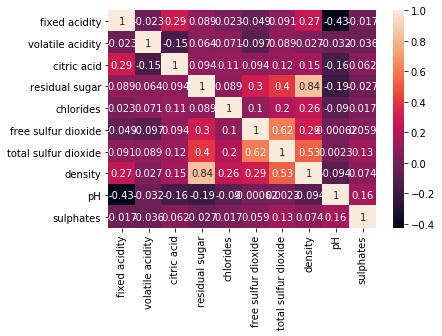

<Figure size 36000x36000 with 0 Axes>

In [59]:
# Correlation for white wine data set
correlation_matrix_white_wine = white_wine.corr()
sns.heatmap(correlation_matrix_white_wine, annot=True)
plt.figure(figsize=(500,500))
plt.show()